 ## 상품명 : 미래에셋대우 공모 ELS 26005회 조기상환형 조건충족시 연 5%(세전) / 최대손실률 -100%
## 상품정보 : https://www.miraeassetdaewoo.com/ 접속 후 상품정보>ELS 검색에서 날짜 2018/06/08에 26005
## 기초지수 : HSECI - EUROSTOXX50

## Local Vol데이터는 다음채널의 local volatility 참고 : https://github.com/ciiadaesun/Derivative_Pricing

## 
## ELS Pricing with OS 2-dimension

 # Operator Splitting FDM
 
 ## ● Implicit scheme in x variable only in first leg
 ## ● Implicit scheme in y variable only in second leg 
 ## ● Correlation and no derivative terms are averaged

\begin{align}
\ \frac{u_{n,l}^{m+1} - u_{n,l}^{m}}{\Delta t} = \frac{u_{n,l}^{m^\star} - u_{n,l}^{m}}{\Delta t} + \frac{u_{n,l}^{m+1} - u_{n,l}^{m^\star}}{\Delta t} =L_{OS}^{x} u_{n,l}^{m^\star} + L_{OS}^{y} u_{n,l}^{m+1}  \\
\ ( m^\star = m + \frac{1}{2}\delta \tau \ )
\\
\end{align}
 ## First Lag
\begin{align}
\\
\ L_{OS}^{x} u_{n,l}^{m^\star} \\\\= b_n u_{n-1, l}^{m^\star} + a_n u_{n, l}^{m^\star}\ + c_n u_{n+1, l}^{m^\star} = d_m \ 
\\
\\
\ a_n = 1+ \Delta t \times(\frac{1}{2}+ (r-d)n + (\sigma_y n)^2 ) \
\\
\ b_n = - \frac{ (\sigma_y n )^2 \Delta t}{2}
\\
\ c_n = - \frac{ (\sigma_y n )^2 \Delta t }{2} - rn \Delta t \
\\
\ d_{n,l}^m = u_{n,l}^m + \frac{\rho \sigma_y \sigma_x nl \Delta t }{8} (u_{n+1,l+1}^m + u_{n-1,l-1}^m - u_{n-1,l+1}^m - u_{n+1,l-1}^m )\
\end{align}

 ## Second Lag
\begin{align}
\\
\ L_{OS}^{y} u_{n,l}^{m+1} \\\\= b_l u_{n-1, l}^{m+1} + a_l u_{n, l}^{m+1}\ + c_l u_{n+1, l}^{m+1} = d_{m^\star} \ 
\\
\\
\ a_l = 1+ \Delta t\times(\frac{1}{2}+ (r-d)\bullet l + (\sigma_x \bullet l)^2 ) \
\\
\ b_l = - \frac{ (\sigma_x \bullet l )^2 \Delta t}{2}
\\
\ c_l = - \frac{ (\sigma_x \bullet l )^2 \Delta t}{2} - rl\Delta t \
\\
\ d_{n,l}^{m^\star} = u_{n,l}^{m^\star} + \frac{\rho \sigma_y \sigma_x nl\Delta t }{8} (u_{n+1,l+1}^{m^\star} + u_{n-1,l-1}^{m^\star} - u_{n-1,l+1}^{m^\star} - u_{n+1,l-1}^{m^\star} )\
\end{align}

 ## Boundary Condition ( First Lag)
\begin{align}
\ V_{-1, l} = 2V_{0, l} - V_{1,l}\\ V_{n, -1} = 2V_{n, 0} - V_{n,1}  \\ \ V_{(N+1 , l)}= 2V_{(N ,l)}-V_{(N-1,l)} \\ V_{(n , L+1)}= 2V_{(n ,L)}-V_{(n,L-1)}\\ \\
\ d_{(0, l)}^{m} >> u_{0,l}^{m} \\
\ d_{(n, 0)}^{m} >> u_{n,0}^{m} \
\\
 d_{(N, l)}^{m} >> u_{N,l}^{m} + \frac{\rho \sigma_y \sigma_x Nl\Delta t }{8} (2u_{N,l+1}^{m} + 2u_{N-1,l-1}^{m} - 2u_{N-1,l+1}^{m} - 2u_{N,l-1}^{m} )
\\
 d_{(n, L)}^{m} >> u_{n,L}^{m} + \frac{\rho \sigma_y \sigma_x nL\Delta t }{8} (2u_{n+1,L}^{m} + 2u_{n-1,L-1}^{m} - 2u_{n+1,L-1}^{m} - 2u_{n-1,L}^{m} )
\end{align}

 ## Matrix ( First Lag)
$$\begin{bmatrix} b_0 + 2a_0 & c_0-a_0 & 0 & 0& ... & 0& 0 & 0\\ a_1 & b_1 & c_1& 0& ...& 0 & 0& 0 \\ 0 & a_2 & b_2& c_2& ...& 0 & 0& 0\\ 0 & 0 & a_3& b_3& ...& 0& 0& 0\\ ... & ... & ...& ...& ...& 0& 0& 0\\ 0 & 0 & 0& 0& ...& a_{N-1} & b_{N-1}& c_{N-1}\\ 0 & 0 & 0& 0& 0& 0& a_{N}-c_{N}& b_{N}+2c_{N} \end{bmatrix} u_{n,l}^{m^\star} = 
\begin{bmatrix} d_{0,0}^{m} & d_{0,1}^{m} & .. & ...& ... & ...& ... & d_{0,L}^{m}\\ d_{1,0}^{m} & d_{1,1}^{m} &...& ...& ...& ... & ...& ... \\ ... & ... & ...& ...& ...& ... & ...& ...\\   &   &  & & ...& &  &  \\ ... & ... & ...& ...& ...&  &  &  \\   &   &  &  & ...&   & d_{N-1,L-1}^{m}& d_{N-1,L}^{m}\\   &   &  &  &  &  &  & d_{N,L}^{m} \end{bmatrix}$$ 

\begin{align}
\\
{u_{n,l}^{m^{\star}}} = (triagonal_1)^{-1}  d_{n,l}^{m}\  \\ \\
(triagonal_1)^{-1}\ \sim (function1) \  : \  Inv\_tridia\_mat(h,\ r,\ Div,\ sig_{x\ or\ y},\ n_{x\ or\ y}) \\ \\
d_{n,l}^{m}\ \sim (function2) : Calculate\_d(sig_{x\ or\ y},\ sig_{y\ or\ x},\ rho,\ n_{x\ or\ y}, n_{y\ or\ x}\ , h\ , DataT) \\
\end{align}
 ## Repeat This Logic on Second Lag
\begin{align}
\\
{u_{n,l}^{m+1} = (triagonal_2)^{-1} \times d_{n,l}^{m^\star}\ }
\\
{(m = 0 >> Maturity  , m = T >> Current)}
\end{align}

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.sparse import diags
from numba import jit
from mpl_toolkits.mplot3d import Axes3D
import warnings
warnings.filterwarnings(action='ignore') 

In [2]:
cd C:\Users\USER\Quant

C:\Users\USER\Quant


In [3]:
preprocessing_vol = lambda path_local_vol : pd.read_excel(path_local_vol,index_col = 0)
preprocessing_discount = lambda path_rf : pd.read_excel(path_rf,parse_dates = ['Maturity Date'], index_col = 0)['Discount'].resample('D').last().interpolate(method = 'cubic')

def local_vol_array(local_vol, pricing_date, autocall_date, coupon_freq_of_year , max_multiple, S_T, S0 = 100) :
    #######################################
    ## ELS의 잔여만기를 계산하고          #
    ## 그에 따른 local volatility를 리턴  #
    #######################################
    T = len(autocall_date[autocall_date>=pricing_date])/coupon_freq_of_year
    trange = np.arange(0,T+0.5, 1/coupon_freq_of_year)[1:]
    v = local_vol[(trange*12).astype(int)]
    ind = pd.DataFrame(index = np.arange(0,max_multiple*S0+1,1))
    vol_data = pd.concat([v,ind],axis=1).interpolate(method = 'cubic').fillna(method = 'ffill').fillna(method = 'bfill')
    return np.array(vol_data.loc[S_T.astype(int)])

def calculate_forward_rate(autocall_date, pricing_date, discount) :
    #######################################
    ## ELS의 잔여만기의 선도금리를 계산   #
    #######################################    
    autocall_date, pricing_date = pd.to_datetime(autocall_date) , pd.to_datetime(pricing_date)
    autocall_date = autocall_date[autocall_date>=pricing_date]
    PV = discount.loc[autocall_date]
    deltat = pd.Series(PV.index,index = PV.index).diff().apply(lambda x : x.days).fillna((PV.index[0] - pricing_date).days)/365
    r0 = -1/deltat[0]*np.log(discount[deltat.index[0]])
    fr1toM = 1/deltat.values[1:] *(PV.values[:-1]/PV.values[1:] - 1)
    forward_rate = np.array([r0] + list(fr1toM))
    return forward_rate
@jit
def Inv_tridia_mat(h, r, Div, sig, n) :
    ############################################
    ## Inverse Tridiagonal Matrix (function1) ##
    ############################################
    
    a = (     1 + h*(0.5*r + (r-Div)*n + (sig*n)**2)         )
    b = (     -(sig*n)**2*0.5*h                                )
    c = (     -(sig*n)**2*0.5*h - (r-Div)*n*h                )   
    
    a[0]  = a[0]  + 2*b[0]
    a[-1] = a[-1] + 2*c[-1]
    c[0]  = c[0]  - b[0]
    b[-1] = b[-1] - c[-1]    
    
    k           = np.array([b[1:], a, c[:-1]])
    offset      = [-1,0,1]
    diag        = diags(k,offset).toarray()    
    return np.linalg.inv(diag)
@jit
def Calculate_d(sig1, sig2, rho, n1, n2, h , DataT) :
    ####################################
    ## Calculate Matrix d (function2) ##
    ####################################
    shape1, shape2 = (-1,1) , (1,-1)
    AAA = rho * sig1.reshape(shape1) * sig2.reshape(shape2) * h / 8
    nl = n1.reshape(shape1).dot(n2.reshape(shape2))
    D = np.zeros(DataT.shape)
    d = DataT[1:-1,1:-1] + AAA[1:-1,1:-1] * nl[1:-1,1:-1] * (DataT[2:,2:]+DataT[:-2,:-2]-                                                                                                      
                                                              DataT[:-2,2:]-DataT[2:,:-2])
    D[1:-1,1:-1] = d        
    D[-1,1:-1]=DataT[-1,1:-1]+AAA[-1,1:-1]*nl[-1,1:-1]*(2*(DataT[-1,2:]+                                                               
                                                            DataT[ -2, :-2] -
                                                            DataT[ -2, 2:]  -
                                                            DataT[ -1, :-2]))
    D[1:-1,-1]=DataT[1:-1,-1]+AAA[1:-1,-1]*nl[1:-1,-1]*(2*(DataT[ 2:, -1]+
                                                            DataT[ :-2, -2] -
                                                            DataT[ 2:, -2]  -
                                                            DataT[ :-2, -1]))
    D[-1,-1] = D[-1,-2] * 0.5 + D[-2,-1]*0.5
    return D
@jit
def Calculate_Next_U(sig1, sig2, rho, n1, n2, h, DataT, tdiag1, tdiag2) :
    ########################
    ## u(t) -> u(t+0.5dt) ##
    ########################
    D = Calculate_d(sig1, sig2, rho, n1, n2 , h, DataT)
    Data_hat = tdiag1.dot(D)
    Data_hat_T = Data_hat.T
    ########################
    ## u(t+0.5) -> u(t+1) ##
    ########################       
    D = Calculate_d(sig2, sig1, rho, n2, n1, h, Data_hat_T)
    Next_U_T = tdiag2.dot(D)
    return Next_U_T.T

def OS_Step_down_ELS_2d(pricing_date,
                        autocall_date, 
                        K_ary, 
                        KI_ary,
                        coupon_rate, 
                        x_vol,
                        y_vol, 
                        discount,
                        rho,
                        Divx,
                        Divy,
                        number_of_node = 200, max_multiple = 2, 
                        X_Today = 100,Y_Today = 100,S0 = 100,
                        price_info = False,
                        coupon_freq_of_year = 2) :
    
    N = number_of_node
    pricing_date, autocall_date = pd.to_datetime(pricing_date), pd.to_datetime(autocall_date)
    bdate_to_maturity = pd.bdate_range(pricing_date, autocall_date[-1]).append(autocall_date).unique().sort_values()    
    bdate_to_maturity = bdate_to_maturity[bdate_to_maturity>=pricing_date]
    #######################
    ### basic settiings ###
    #######################

    F = 100
    Frate = calculate_forward_rate(autocall_date, pricing_date, discount)
    T = np.round((autocall_date[-1] - pricing_date).days/365,1)
    C_ary = np.repeat([coupon_rate/coupon_freq_of_year],len(autocall_date)).cumsum()[-len(autocall_date[autocall_date>=pricing_date]):]
    h = T/len(bdate_to_maturity)

    S_T = S0 * np.linspace(0,max_multiple,N+1)
    local_volx = local_vol_array(x_vol, pricing_date, autocall_date, coupon_freq_of_year , max_multiple, S_T, S0 = S0)
    local_voly = local_vol_array(y_vol, pricing_date, autocall_date, coupon_freq_of_year , max_multiple, S_T, S0 = S0)
    ###########################
    ## variables to calculate #
    ###########################
    n = np.arange(0,N+1)
    r, KI, K ,C = Frate[-1], KI_ary[-1], K_ary[-1] , C_ary[-1]
    sigx, sigy = local_volx[:,-1], local_voly[:,-1]
    Inv_tdiagx = Inv_tridia_mat(h,r,Divx,sigx,n)
    Inv_tdiagy = Inv_tridia_mat(h,r,Divy,sigy,n)
    #####################
    ## Maturity Payoff ##
    #####################
    KI_condition = (S_T < S0 * KI).sum()
    K_condition = (S_T < S0 * K).sum()
    if_KI = np.minimum(S_T.reshape(-1,1), S_T.reshape(1,-1))
    if_NKI =np.minimum(S_T.reshape(-1,1), S_T.reshape(1,-1))
    if_KI[K_condition:,K_condition:] = F * (1+C) 
    if_NKI[KI_condition :, KI_condition:] = F * (1+C)
    i_range = bdate_to_maturity[::-1][1:]
    n_of_payment = 1
    ###############
    # compile jit #
    ###############
    Inv_tridia_mat(h = 0.01, r = 0.01, Div = 0, sig = 0.02, n = np.arange(1,3))
    Calculate_d(sig1=np.ones((3)), sig2=np.ones((3)), rho=0.01, n1=np.arange(3), 
                n2=np.arange(3), h=0.01 , DataT = np.zeros((3,3)))
    Calculate_Next_U(np.ones((3)), np.ones((3)), 0.01, np.arange(3), np.arange(3), 0.01, np.zeros((3,3)), np.ones((3,3)), np.ones((3,3)))
    
    for i in i_range :
        if_KI = Calculate_Next_U(sigx, sigy, rho, n, n, h, if_KI, Inv_tdiagx, Inv_tdiagy)
        if_NKI = Calculate_Next_U(sigx, sigy, rho, n, n, h, if_NKI, Inv_tdiagx, Inv_tdiagy)
        ###### Overwrite the NKI price under KI node ######
        if_NKI[:KI_condition,:] = if_KI[:KI_condition,:]
        if_NKI[:,:KI_condition] = if_KI[:,:KI_condition]
        if i in autocall_date :
            n_of_payment +=1
            sigx,sigy = local_volx[:,-n_of_payment],local_voly[:,-n_of_payment]
            r = Frate[-n_of_payment]
            KI,K = KI_ary[-n_of_payment] ,K_ary[-n_of_payment] 
            C = C_ary[-n_of_payment]

            KI_condition = (S_T < S0 * KI).sum()
            K_condition = (S_T < S0 * K).sum() 
            if_KI[K_condition:,K_condition:] = F * (1+C) 
            if_NKI[K_condition :, K_condition:] = F * (1+C)
            Inv_tdiagx = Inv_tridia_mat(h, r, Divx, sigx, n )
            Inv_tdiagy = Inv_tridia_mat(h, r, Divy, sigy, n )        
    p_index1 = np.abs(S_T - X_Today).argmin()
    p_index2 = np.abs(S_T - Y_Today).argmin()
    if price_info == True : 
        price = if_NKI[p_index1, p_index2]
        return if_NKI , price
    else :
        return if_NKI
    
def Plotting_ELS_Price(Pmatrix,max_multiple=2,X_0=100,Y_0 = 100,color = 'green',
                       X_name = 'X', Y_name = 'Y',Z_name = 'ELS_Price'):
    n1 = np.linspace(0,max_multiple,Pmatrix.shape[0])*X_0
    n2 = np.linspace(0,max_multiple,Pmatrix.shape[1])*Y_0
    x,y = np.meshgrid(n1,n2)
    fig = plt.figure(figsize = (12,12))
    ax = fig.add_subplot(111,projection = '3d')
    ax.set_title('Result of OS FDM')
    ax.plot_surface(x,y,Pmatrix, color = color)    
    ax.set_xlabel(X_name)
    ax.set_ylabel(Y_name)
    ax.set_zlabel(Z_name)
    plt.show()

In [4]:
Pmat, P = OS_Step_down_ELS_2d(pricing_date = '2018-06-08',
                        autocall_date = ['2018-12-04','2019-06-03','2019-12-03',
                                         '2020-06-03','2020-12-03','2021-06-03'],
                        K_ary = [0.9,   0.9,   0.9,   0.85,  0.85,  0.8  ],
                        KI_ary =[0.5,   0.5,   0.5,   0.5,   0.5,   0.5  ],
                        coupon_rate =0.05 , 
                        x_vol= preprocessing_vol('HSI_local_vol.xlsx') ,
                        y_vol=preprocessing_vol('SX5E_local_vol.xlsx'),
                        discount=preprocessing_discount('rf.xlsx'),
                        rho = 0.316, 
                        Divx = 0.03711,
                        Divy = 0.03419,
                        number_of_node = 200,
                        max_multiple = 2,
                        coupon_freq_of_year=2, price_info = True)
P

95.48541123626102

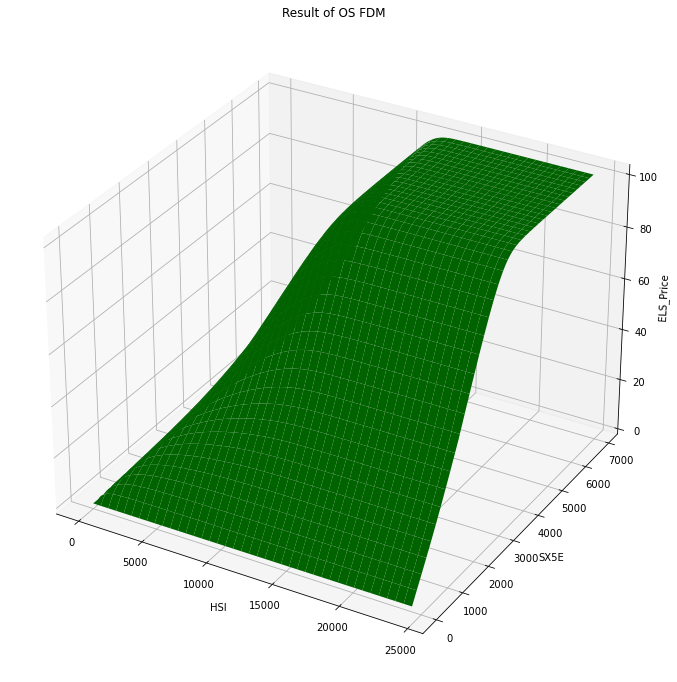

In [5]:
Plotting_ELS_Price(Pmat, 2, 12166, 3446,X_name = 'HSI',Y_name = 'SX5E')

 ### price after pricing_date

In [6]:
OS_Step_down_ELS_2d(pricing_date = '2019-03-08',
                        autocall_date = ['2018-12-04','2019-06-03','2019-12-03',
                                         '2020-06-03','2020-12-03','2021-06-03'],
                        K_ary = [0.9,   0.9,   0.9,   0.85,  0.85,  0.8  ],
                        KI_ary =[0.5,   0.5,   0.5,   0.5,   0.5,   0.5  ],
                        coupon_rate =0.05 , 
                        x_vol= preprocessing_vol('HSI_local_vol.xlsx') ,
                        y_vol=preprocessing_vol('SX5E_local_vol.xlsx'),
                        discount=preprocessing_discount('rf2.xlsx'),
                        rho = 0.316, 
                        Divx = 0.03711,
                        Divy = 0.03419,
                        number_of_node = 200,
                        max_multiple = 2, X_Today= 111,Y_Today = 130,price_info=True)[1]

104.56634589360868

 ### Local Volatility Monte Carlo Simulation
 
 $$
 \begin{array}{c}
 dS  = (r-D)Sdt + \sigma(S,t) Sd \hat{W}
 \end{array}
 $$



In [7]:
def local_vol_for_MC(local_vol , T ,autocall_date, coupon_freq_of_year) :
    S_index = np.arange(local_vol.index[0], local_vol.index[-1]+0.001).astype(int)
    T_index =  (np.linspace(0,T, len(autocall_date)+1)[1:]*12).astype(int)
    s_range = pd.DataFrame(index= S_index)
    trange = pd.DataFrame(index =T_index)
    local_var_s_range = pd.concat([s_range,local_vol**2],axis = 1).interpolate(method = 'cubic')
    local_var_t_range = pd.concat([trange,local_var_s_range.fillna(method = 'ffill').fillna(method = 'bfill').T],axis=1)
    local_vol_MC = np.sqrt(local_var_t_range.interpolate(method = 'cubic').fillna(method = 'ffill').fillna(method = 'bfill').T)[T_index]
    return local_vol_MC
@jit
def vol_index(ST,S_index) :
    return np.abs( np.round(ST,0).reshape(1,-1) - S_index.reshape(-1,1)).argmin(axis=0)

def autocall_dates_and_case(min_value, ac_date_index , K_ary, S0) :
    min_value_ac_date = min_value[ac_date_index,:][:-1]
    AC_matrix = min_value_ac_date >= np.array(K_ary[:-1]).reshape(-1,1) * S0
    AC_when = (AC_matrix.cumsum(0).cumsum(0) == 1)
    AC_case_of_total = AC_when.sum(0).reshape(1,-1)
    return AC_when, AC_case_of_total
@jit
def calculate_next_XY(X_before,Y_before,rho, simul_number,volx,voly,deltat,r,Divx,Divy) :
        ###########################
        # fast simulation method  #
        # half = e left -e        #
        ###########################
        half_simul_num = int(simul_number/2+0.5)
        e_xy1 = np.random.multivariate_normal([0,0],[[1,rho],[rho,1]], size = half_simul_num)
        e_xy2 = -e_xy1
        e_xy = np.concatenate([e_xy1,e_xy2],axis = 0)[:simul_number,:]
        e_x = e_xy[:,0]
        e_y = e_xy[:,1]      
        diffusionX = volx * X_before * np.sqrt(deltat) * e_x
        diffusionY = voly * Y_before * np.sqrt(deltat) * e_y
        driftX = (r-Divx) * X_before * deltat
        driftY = (r-Divy) * Y_before * deltat 
        return X_before + driftX + diffusionX, Y_before + driftY + diffusionY  
    
def MC_Step_down_ELS_2d(pricing_date,
                        autocall_date, 
                        K_ary, 
                        KI_ary,
                        coupon_rate, 
                        x_vol,
                        y_vol, 
                        discount,
                        rho,
                        Divx,
                        Divy,
                        simul_number = 10000,
                        coupon_freq_of_year = 2,
                        S0 = 100, 
                        X_Today = 100, Y_Today = 100) :
   
    pricing_date = pd.to_datetime(pricing_date) 
    autocall_date = pd.to_datetime(autocall_date) 
    ac_len = len(autocall_date)
    pricing_date, autocall_date = pd.to_datetime(pricing_date), pd.to_datetime(autocall_date)
    bdate_to_maturity = pd.bdate_range(pricing_date, autocall_date[-1]).append(autocall_date).unique().sort_values()    
    bdate_to_maturity = bdate_to_maturity[bdate_to_maturity>=pricing_date]
    autocall_date = autocall_date[autocall_date>=pricing_date]
    ac_date_index = list(np.vectorize(list(bdate_to_maturity).index)(autocall_date))
    left_ac = len(ac_date_index)
    KI_ary= KI_ary[-left_ac:]
    K_ary = K_ary[-left_ac:]
    #######################
    ### basic settiings ###
    #######################

    F =  100
    Frate = calculate_forward_rate(autocall_date, pricing_date, discount)
    T = np.round((autocall_date[-1] - pricing_date).days/365,1)
    C_ary = np.repeat([coupon_rate/coupon_freq_of_year],ac_len).cumsum()[-len(autocall_date):]
    deltat = T/len(bdate_to_maturity)
    
    x_localvol = local_vol_for_MC(x_vol , T ,autocall_date, coupon_freq_of_year).T
    y_localvol = local_vol_for_MC(y_vol , T ,autocall_date, coupon_freq_of_year).T
    S_index = np.array(x_localvol.columns)
    x_localvolarray = np.array(x_localvol) # using array for jit not DataFrame
    y_localvolarray = np.array(y_localvol) # using array for jit not DataFrame
    rf = Frate
    X = np.zeros((len(bdate_to_maturity),simul_number))
    X[0] = X_Today
    Y = X + 0
    Y[0] = Y_Today
    
    ### finding vol index ###    
    vol_index = lambda ST, S_index : np.abs( np.round(ST,0).reshape(1,-1) - S_index.reshape(-1,1)).argmin(axis=0)

    r = rf[0]
    sig_x_array = x_localvolarray[0]
    sig_y_array = y_localvolarray[0]
    coupon_payment = 0
    #################
    ## compile jit ##
    #################
    calculate_next_XY(np.array([1]*3),np.array([1]*3),0.5,3,np.array([0.2]*3),np.array([0.2]*3),0.01,0.01,0.01,0.01 )
    vol_index(X[0], S_index)
    for i in range(1,len(bdate_to_maturity)) :
        
        X_before , Y_before= X[i-1] , Y[i-1]
        volx = sig_x_array[vol_index(X_before,S_index)]
        voly = sig_y_array[vol_index(Y_before,S_index)]  
        
        X[i],Y[i] = calculate_next_XY(X_before,Y_before,rho, simul_number,
                                      volx,voly,deltat,r,Divx,Divy)
        if i in ac_date_index and i < len(bdate_to_maturity)-1:
            coupon_payment +=1
            r = rf[coupon_payment]
            sig_x_array = x_localvolarray[coupon_payment]
            sig_y_array = y_localvolarray[coupon_payment]
    min_value = np.minimum(X, Y)
    ########################
    ### 1. Autocall Case ###
    ########################
    AC_when,AC_case = autocall_dates_and_case(min_value, ac_date_index , K_ary[-left_ac:],S0)
    DF_AC = np.array(discount.loc[autocall_date])[:-1].reshape(-1,1)
    value_AC = np.array((F * (1+C_ary[:-1].reshape(-1,1)) * pd.DataFrame(AC_when) * DF_AC).sum(0))
    ######################################
    ### 2. Not Autocall and Knock In   ###
    ######################################
    KI_ = pd.Series(index = bdate_to_maturity)
    KI_.loc[autocall_date] = np.array(KI_ary) * S0
    KI_ = np.array(KI_.fillna(method = 'bfill')).reshape(-1,1)
    KI_case = (min_value[:-1] < KI_[:-1]).max(0).reshape(1,-1)
    NKI_case = 1-KI_case
    Not_AC_case = 1-AC_case
    Not_AC_KI =Not_AC_case * KI_case
    min_value_at_maturity = min_value[-1:,:]
    DF_T = discount.loc[autocall_date].iloc[-1]
    ##############################################
    ### 2-1. Value (Not Autocall and Knock In) ###
    ##############################################
    Not_AC_KI_over_K =  Not_AC_KI * (min_value_at_maturity >= S0 * K_ary[-1])
    Not_AC_KI_under_K = (Not_AC_KI - Not_AC_KI_over_K)
    value_Not_AC_KI_over_K = Not_AC_KI_over_K * F * (1+C_ary[-1])  * DF_T
    value_Not_AC_KI_under_K = Not_AC_KI_under_K * (min_value_at_maturity / S0 * F ) * DF_T
    ###################################################
    ### 2-2. Value (Not Autocall and Not Knock In)  ###
    ###################################################
    Not_AC_NKI =Not_AC_case * NKI_case
    Not_AC_NKI_over_KI = Not_AC_NKI * (min_value_at_maturity >= S0 * KI_ary[-1])
    Not_AC_NKI_under_KI = Not_AC_NKI - Not_AC_NKI_over_KI
    value_Not_AC_NKI_over_KI = F * (1+C_ary[-1]) * Not_AC_NKI_over_KI * DF_T
    value_Not_AC_NKI_under_KI = Not_AC_NKI_under_KI * (min_value_at_maturity/S0 * F) * DF_T
    path_value_of_els = value_AC + value_Not_AC_KI_over_K + value_Not_AC_KI_under_K + value_Not_AC_NKI_over_KI + value_Not_AC_NKI_under_KI

    return path_value_of_els.mean()


In [8]:
p_mc=MC_Step_down_ELS_2d(pricing_date ='2018-06-08' ,
                         autocall_date = ['2018-12-04','2019-06-03','2019-12-03',
                                         '2020-06-03','2020-12-03','2021-06-03'], 
                         K_ary= [0.9,   0.9,   0.9,   0.85,  0.85,  0.8  ] , 
                         KI_ary = [0.5,   0.5,   0.5,   0.5,   0.5,   0.5  ],
                         coupon_rate= 0.05, 
                         x_vol= preprocessing_vol('HSI_local_vol.xlsx') ,
                         y_vol=preprocessing_vol('SX5E_local_vol.xlsx'),
                         discount=preprocessing_discount('rf.xlsx'),
                         rho = 0.316,
                         Divx = 0.03711,
                         Divy = 0.03419,
                         simul_number = 10000, 
                         coupon_freq_of_year= 2)
p_mc

95.35965468762593

 ### price after pricing_date

In [9]:
p_mc=MC_Step_down_ELS_2d(pricing_date ='2019-03-08' ,
                         autocall_date = ['2018-12-04','2019-06-03','2019-12-03',
                                         '2020-06-03','2020-12-03','2021-06-03'], 
                         K_ary= [0.9,   0.9,   0.9,   0.85,  0.85,  0.8  ] , 
                         KI_ary = [0.5,   0.5,   0.5,   0.5,   0.5,   0.5  ],
                         coupon_rate= 0.05, 
                         x_vol= preprocessing_vol('HSI_local_vol.xlsx') ,
                         y_vol=preprocessing_vol('SX5E_local_vol.xlsx'),
                         discount=preprocessing_discount('rf2.xlsx'),
                         rho = 0.316,
                         Divx = 0.03711,
                         Divy = 0.03419,
                         simul_number = 10000, 
                         coupon_freq_of_year= 2,  X_Today= 111,Y_Today = 130)
p_mc

104.56877352447013

In [10]:
class greeks :
    def vegax(pricing_date,
              autocall_date, 
              K_ary, 
              KI_ary,
              coupon_rate, 
              x_vol,
              y_vol, 
              discount,
              rho,
              Divx,
              Divy,
              number_of_node, 
              max_multiple, 
              S0 = 100, X_Today = 100, 
              Y_Today = 100,
              coupon_freq_of_year = 2) :
        P1= OS_Step_down_ELS_2d(pricing_date,autocall_date, K_ary, KI_ary,coupon_rate, x_vol,
                                y_vol, discount,rho,Divx,Divy,number_of_node, 
                                max_multiple , price_info = True, S0 = S0 , X_Today = X_Today, 
                                Y_Today = Y_Today, coupon_freq_of_year = 2)[1]
        P2= OS_Step_down_ELS_2d(pricing_date,autocall_date, K_ary, KI_ary,coupon_rate, x_vol +0.01,
                                y_vol, discount,rho,Divx,Divy,number_of_node, 
                                max_multiple , price_info = True,S0 = S0 , X_Today = X_Today,
                                Y_Today = Y_Today,coupon_freq_of_year = 2)[1]
        autocall_date , pricing_date = pd.to_datetime(autocall_date), pd.to_datetime(pricing_date)
        T = np.round((autocall_date[-1] - pricing_date).days/365,1)
        coupon_freq_of_year = int(len(autocall_date)/T)
        trange = (np.linspace(0,T,int(np.round(T * coupon_freq_of_year,0)) +1)[1:] * 12).astype(int)
        vega = P2-P1
        return vega
    
    def vegay(pricing_date,
              autocall_date, 
              K_ary, 
              KI_ary,
              coupon_rate, 
              x_vol,
              y_vol, 
              discount,
              rho,
              Divx,
              Divy,
              number_of_node,
              max_multiple,
              S0 = 100, X_Today = 100, 
              Y_Today = 100,
              coupon_freq_of_year = 2) :

        P1= OS_Step_down_ELS_2d(pricing_date,autocall_date, K_ary, KI_ary,coupon_rate, x_vol,
                                y_vol, discount,rho,Divx,Divy,number_of_node, 
                                max_multiple , price_info = True, S0 = S0 , X_Today = X_Today, 
                                Y_Today = Y_Today, coupon_freq_of_year = 2)[1]
        P2= OS_Step_down_ELS_2d(pricing_date,autocall_date, K_ary, KI_ary,coupon_rate, x_vol,
                                y_vol+0.01, discount,rho,Divx,Divy,number_of_node, 
                                max_multiple , price_info = True,S0 = S0 , X_Today = X_Today,
                                Y_Today = Y_Today,coupon_freq_of_year = 2)[1]
        autocall_date , pricing_date = pd.to_datetime(autocall_date), pd.to_datetime(pricing_date)
        T = np.round((autocall_date[-1] - pricing_date).days/365,1)
        coupon_freq_of_year = int(len(autocall_date)/T)
        trange = (np.linspace(0,T,int(np.round(T * coupon_freq_of_year,0)) +1)[1:] * 12).astype(int)
        vega = P2-P1
        return vega
    
    def Delta(pricing_date, 
              autocall_date, 
              K_ary, 
              KI_ary, 
              coupon_rate, 
              x_vol, 
              y_vol, 
              discount,
              rho , 
              Divx, 
              Divy, 
              number_of_node,
              max_multiple=2, 
              coupon_freq_of_year=2,
              X_Today= 100,
              Y_Today=100,
              S0=100,
              Gamma = True) :
        P ,Price = OS_Step_down_ELS_2d(pricing_date,autocall_date, K_ary, KI_ary,coupon_rate, x_vol,
                                       y_vol, discount,rho,Divx,Divy,number_of_node , max_multiple , 
                                       X_Today ,Y_Today ,S0,True,coupon_freq_of_year)
        N = number_of_node
        S_T = S0 * np.linspace(0,max_multiple,N+1)
        p_index1 = np.abs(S_T - X_Today).argmin()
        p_index2 = np.abs(S_T - Y_Today).argmin()
        dS_percent = (S_T[1:] - S_T[:-1]).mean()/S0
        dELS_X_percent = (P[p_index1+1,p_index2] - P[p_index1,p_index2])/ P[p_index1,p_index2]
        dELS_Y_percent = (P[p_index1,p_index2+1] - P[p_index1,p_index2])/ P[p_index1,p_index2]
        Delta_X = dELS_X_percent/dS_percent
        Delta_Y = dELS_Y_percent/dS_percent
        if Gamma == True :
            dELS_X_percent2 = (P[p_index1+2,p_index2] - P[p_index1+1,p_index2])/ P[p_index1+1,p_index2]
            dELS_Y_percent2 = (P[p_index1,p_index2+2] - P[p_index1,p_index2+1])/ P[p_index1,p_index2+1]        
            Delta_X2 = dELS_X_percent2/dS_percent
            Delta_Y2 = dELS_Y_percent2/dS_percent
            GammaX = ((Delta_X2 - Delta_X)/100)/(dS_percent)
            GammaY = ((Delta_Y2 - Delta_Y)/100)/(dS_percent)
            return {'OS_Price' : Price,'Delta_X' : Delta_X , 'Delta_Y':Delta_Y ,'Gamma_X': GammaX,'Gamma_Y':GammaY}
        else :
            return {'OS_Price' : Price,'Delta_X' : Delta_X , 'Delta_Y':Delta_Y }

In [11]:
def ELS_info(pricing_date ,
             autocall_date,
             K_ary,
             KI_ary ,
             coupon_rate ,
             x_vol, 
             y_vol,
             discount,
             rho,
             Divx,
             Divy,
             number_of_node=200, 
             max_multiple=2 ,
             coupon_freq_of_year =2,
             S0 =100,X_Today = 100,Y_Today = 100,
             simul_number = 10000):
    DG = greeks.Delta(pricing_date, autocall_date, K_ary, 
                      KI_ary, coupon_rate, x_vol, 
                      y_vol, discount,rho , 
                      Divx, Divy, number_of_node,
                      max_multiple, coupon_freq_of_year,
                      X_Today,Y_Today,S0,Gamma = True)
    DG = pd.Series(DG)
    vx = greeks.vegax(pricing_date,autocall_date, K_ary, 
                  KI_ary,coupon_rate, x_vol,
                  y_vol, discount,rho,
                  Divx,Divy,number_of_node,
                  max_multiple,S0 , X_Today , 
                  Y_Today ,coupon_freq_of_year) 
    vy = greeks.vegay(pricing_date,autocall_date, K_ary, 
                  KI_ary,coupon_rate, x_vol,
                  y_vol, discount,rho,
                  Divx,Divy,number_of_node,
                  max_multiple,S0 , X_Today , 
                  Y_Today ,coupon_freq_of_year) 
    ELS_info = pd.DataFrame(pd.Series(DG).rename('ELS_info')).T
    MC_P = MC_Step_down_ELS_2d(pricing_date,autocall_date, K_ary, KI_ary,
                               coupon_rate, x_vol,y_vol, discount,rho,
                               Divx,Divy,simul_number,coupon_freq_of_year,
                               S0, X_Today, Y_Today )
    ELS_info['vegax'] = vx
    ELS_info['vegay'] = vy
    ELS_info['MC_Price'] = MC_P
    return ELS_info.T

In [12]:
ELS_info(pricing_date = '2018-06-08',
        autocall_date= ['2018-12-04','2019-06-03','2019-12-03','2020-06-03','2020-12-03','2021-06-03'],
        K_ary = [0.9,   0.9,   0.9,   0.85,  0.85,  0.8  ],
        KI_ary =[0.5,   0.5,   0.5,   0.5,   0.5,   0.5  ],
        coupon_rate =0.05,
        x_vol= preprocessing_vol('HSI_local_vol.xlsx'),
        y_vol=preprocessing_vol('SX5E_local_vol.xlsx') ,
        discount=preprocessing_discount('rf.xlsx'),
        rho = 0.316,
        Divx = 0.03711,
        Divy = 0.03419,
        number_of_node = 300 ,
        max_multiple = 3,
        coupon_freq_of_year=2,
        S0 =100,
        X_Today = 100,
        Y_Today = 100,
        simul_number = 10000)

,ELS_info
OS_Price,95.485411
Delta_X,0.416786
Delta_Y,0.414147
Gamma_X,-0.038089
Gamma_Y,-0.042480
vegax,-0.455915
vegay,-0.407565
MC_Price,95.170693
